TP1 : 
1) Coder le sys lineaire en stock creux de l approx DF centree
2) Choisir une solution analytique
3) Comparer le graphe de la soluce exacte et approchée
4) Convergence en grille : ordre de la methode exp
5) Application à a discontinue
6) "" a  "comporte"

In [4]:
#importation des bibliothèques utiles
from matplotlib.pylab import *
from scipy.sparse.linalg import spsolve
from scipy.sparse import spdiags
import sympy as sy

[[ 1253.5   -627.25     0.   ...     0.       0.       0.  ]
 [ -627.25  1259.5   -631.25 ...     0.       0.       0.  ]
 [    0.    -631.25  1269.5  ...     0.       0.       0.  ]
 ...
 [    0.       0.       0.   ...  5859.5  -2977.25     0.  ]
 [    0.       0.       0.   ... -2977.25  6053.5  -3075.25]
 [    0.       0.       0.   ...     0.   -6250.5   6251.5 ]]


C:\Users\phand\AppData\Local\Temp\ipykernel_6620\3118745747.py:63: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  U=spsolve(A, F)


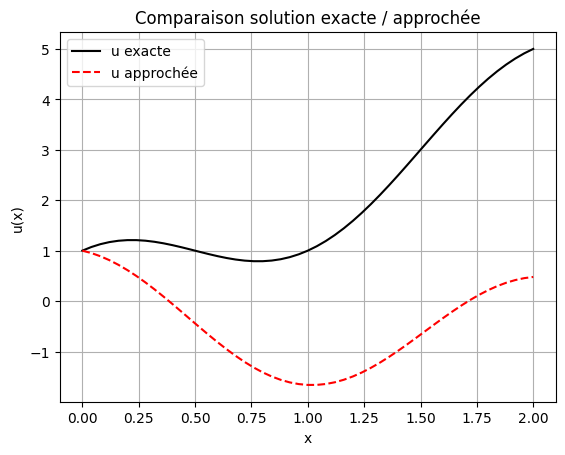

In [ ]:
import numpy as np
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# paramètres
N = 50
L = 2
h = L/N

# Conditions limites
u0 = 1        
u_prime_L = 2  

# maillage : points internes x_1 ... x_N
x = np.linspace(h, L, N)
x_avec_CL=np.linspace(0, L + h, N + 2)

# solution exacte
u_exact = lambda x: np.cos(2*np.pi*x/L) + 2*x
# coefficient a(x)
a = lambda x: 1 + x**2
# f(x) tel que -(a(x) u'(x))' + u(x) = f(x)
alpha = 2.0*np.pi / L
f = lambda x: 2*alpha*x*np.sin(alpha*x) + (alpha**2*(1 + x**2) + 1)*np.cos(alpha*x) - 2*x

# f(x_i)
F = f(x)

# coefficients a_{i+1/2}, a_{i-1/2}
x_ip = x + h/2          # points i+1/2
x_im = x - h/2          # points i-1/2

a_ip = a(x_ip)          # a_{i+1/2}
a_im = a(x_im)          # a_{i-1/2}

# diagonales du schéma :
# -( a_{i+1/2}(u_{i+1}-u_i) - a_{i-1/2}(u_i-u_{i-1}) )/h^2 + u_i
DM = (a_ip + a_im)/h**2 + 1.0
DD = -a_ip/h**2
DG = -a_im/h**2

DD[-2] = -DM[-1]+1

# Conditions limites dans F
# 1) u_0 = u0  => F[0] += a_{1/2} / h^2 * u0
F[0] += a_im[0]/h**2 * u0

# 2) u'(L) = 2  → u_N = u_{N-1} + 2h
#    -(a_{N-1/2}(u_{N+1}-u_N))/h^2 ≈ -(a_{N+1/2}(2h))/h^2 = -2*a_{N+1/2}/h
F[-1] += L/h * u_prime_L

# construction matrice creuse
A = spdiags(
    [DG, DM, DD],
    [1, 0, -1],
    N, N
)

print(A.toarray())

#resolution du systeme creux
U=spsolve(A, F)
plot(x,U)
plt.show()


x_full = np.concatenate(([0.0], x))            # 0, x_1 ... x_N
U_full = np.concatenate(([u0], U))             # u(0)=u0, solutions internes
U_exact_full = u_exact(x_full)

# tracé comparatif
plt.figure()
plt.plot(x_full, U_exact_full, 'k-', label='u exacte')
plt.plot(x_full, U_full, 'r--', label='u approchée')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparaison solution exacte / approchée')
plt.grid(True)
plt.show()